## Declaração de bibliotecas e demais configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
import matplotlib.gridspec as gridspec

from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

np.random.seed(12345) #Deseja fixar a semente geradora de números aleatórios?

## Funções relacionadas ao método ou auxiliares

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados
* Os dados considerados aqui foram obtidos da USGS

* Atributos são:
    * latitude
    * longitude
    * depth
    * mag
    * gap
    * dmin
    * rms
    * horizontalError
    * depthError

* Classes:
    * 1 - MB; (azul escuro)
    * 2 - MD; (ciano)
    * 3 - ML; (verde)
    * 4 - MW; (laranja)
    
##### Definição dos atributos em: https://earthquake.usgs.gov/data/comcat/data-eventterms.php
##### Definição das classes em: https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types

In [5]:
#Dados de treinamento
path = 'EartQuakes_USGS_mar-abr2020.csv'

#Leitura dos dados
y,x_ = read_class_data(path)


#Normalização
x = np.copy(x_) #Cópia da variável
AtributosNormalizar = [2,3,4,5,6,7,8]
for i in AtributosNormalizar:
    mi = x[:,i].min()
    ma = x[:,i].max()
    a = 1/(ma-mi)
    b = -mi/(ma-mi)
    x[:,i] = a*x[:,i] + b

## Visualizacão dos dados de treino/avaliação

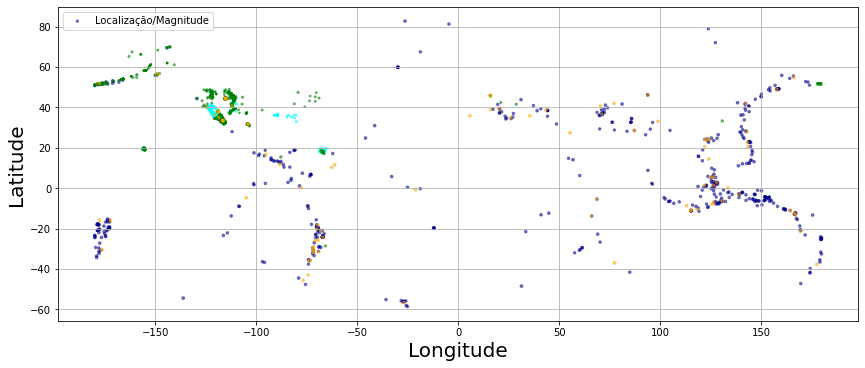

In [6]:
classColor = ['darkblue','cyan','green','orange']
vecCol = []
for i in y: vecCol.append( classColor[int(i-1)] )    

FS = (15,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])

ax.scatter( x[:,1], x[:,0], s=x[:,3]*10, c=vecCol, alpha=0.5, label='Localização/Magnitude')
ax.set_xlabel('Longitude',fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

#ax.set(xlim=(np.min(x[:,0])-1,np.max(x[:,0])+1), ylim=(np.min(x[:,1])-1,np.max(x[:,1])+1))
ax.set_aspect('equal', 'box')

ax.legend(fontsize=10)
ax.grid(True)

## Separação aleatória dos dados para treinamento e avaliação
* É definida uma porcentagem destinada para avaliação, e restante é usado para treino
* Faça uma divisão é aleatoria

## Classificação dos dados
* Realize testes envolvendo combinação de classificadores

## Avaliação do desempenho
* Análise baseada na concordância (%) entre Predição $vs$ Esperado.

## Faça uma análise sobre acurácia das classes
* Escolha qual classificador deseja avaliar!